<a href="https://colab.research.google.com/github/agarwalpratik/aiml/blob/main/DecisionRegionExplanationDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('iris.csv')

In [ ]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
data.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:

#Goal of this program is to show decision regions
#To plot decision regions, we will use mlxtend
#mlxtend expects the label data to be numeric (discrete numerical)
#pip install mlxtend

finalFeatures = data.iloc[:,[0,2]].values
finalLabels = data.variety.replace(['Setosa', 'Versicolor', 'Virginica'],[0,1,2]).values.ravel()

<ipython-input-6-265499d8f69e>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  finalLabels = data.variety.replace(['Setosa', 'Versicolor', 'Virginica'],[0,1,2]).values.ravel()


In [ ]:
finalLabels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(finalFeatures,finalLabels)

LogisticRegression()

<Axes: >

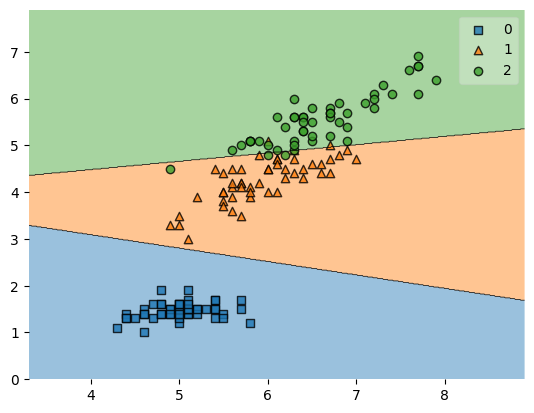

In [ ]:
#use mlxtend to plot decision region

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(finalFeatures, finalLabels, clf=model)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(finalLabels, model.predict(finalFeatures))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [10]:
# Finding best features
# Use feature importance from DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier

finalFeatures = data.iloc[:,[0,1,2,3]].values
finalLabels = data.variety.values.ravel()

model = DecisionTreeClassifier()
model.fit(finalFeatures,finalLabels)



DecisionTreeClassifier()

In [11]:
model.feature_importances_

array([0.        , 0.01333333, 0.56405596, 0.42261071])

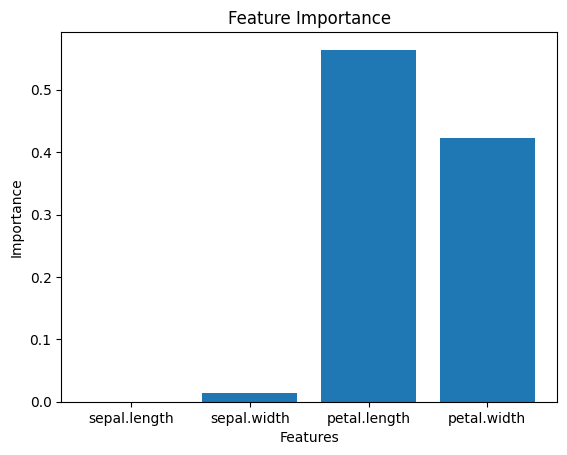

In [12]:
import matplotlib.pyplot as plt

featureImpDF = pd.DataFrame({
    'feature':['sepal.length','sepal.width','petal.length','petal.width'],
    'importance': model.feature_importances_
})

plt.bar(featureImpDF['feature'],featureImpDF['importance'])

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()